In [103]:
import tensorflow as tf
import keras
import pandas as pd
import cv2 as cv
import os
import numpy as np
from PIL import Image, ImageEnhance, ImageEnhance, ImageGrab, ImageOps
import matplotlib.pyplot as plt

# Оглавление  
* Загрузка
* Предобработка и аугментации  
* Классификация (свёрточные сети)

# Загрузка изображений 
Считываем файлы из репозитория в `list`. Если важна названия (там например серия, координаты или даты), то можно и словарь грузить.  
Разделяем их не массивы масок и самих изображения по ключевому слову в названии.


In [16]:
base_path = 'file_path'
mask_key_word = 'mask'
files_format = ['jpeg', 'png', 'jpg']

images = [] 
masks = []
for address, dirs, files in os.walk(base_path):
    #print(address, dirs, files)
    for f in files:
            if any(format in f for format in files_format):
                file_path = os.path.join(address, f)
                if mask_key_word in f:
                    masks.append(Image.open(file_path))
                else:
                    images.append(Image.open(file_path))

print('Количество изображений:', len(images), '\nКоличество масок:', len(masks))  

Количество изображений: 4 
Количество масок: 2


## Устройство изображения  
Каждое имеет ширину, длину и каналы. Они могут быть разными.  
Просмотр изоражений можно с помощью: `cv2.imshow()`, `(Image object).show()`, `plt.imshow()`. Послдений на вход принимает `np.array`

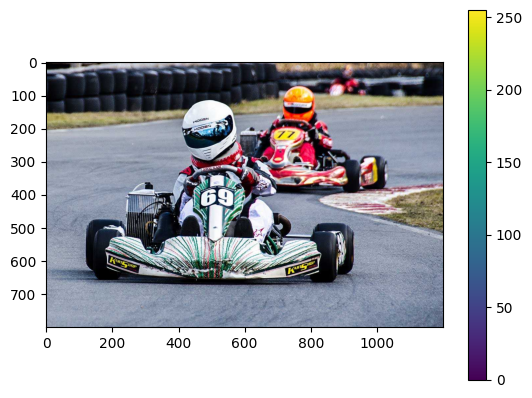

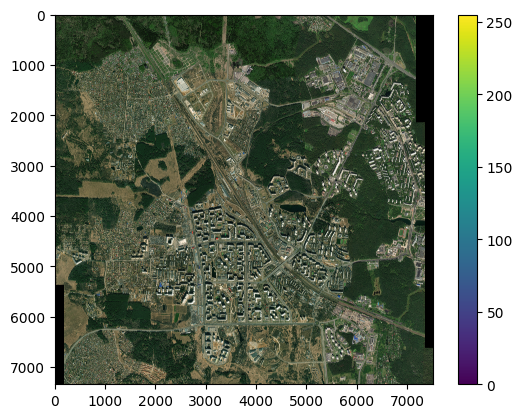

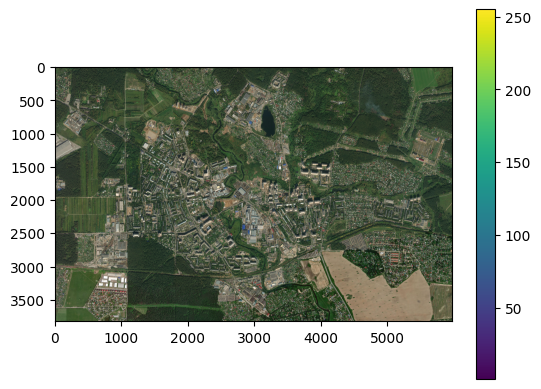

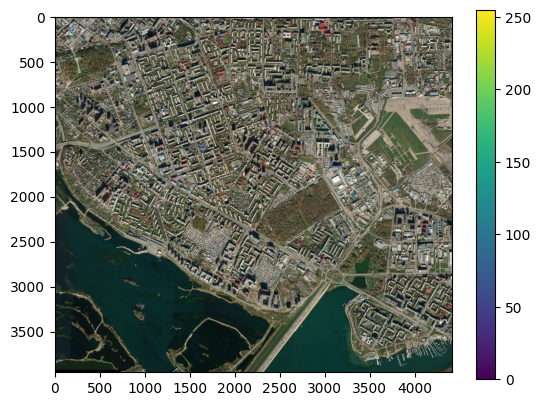

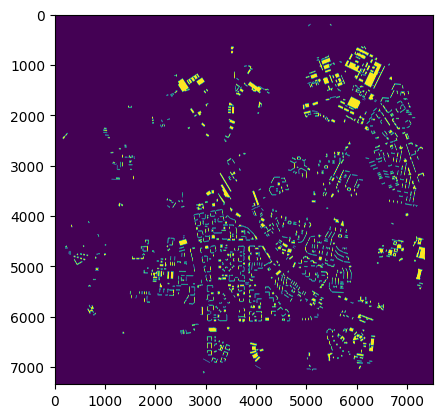

In [18]:
for img in images:
    plt.imshow(np.array(img))
    plt.colorbar()
    plt.show()
plt.imshow(masks[0])

Размер изображения 
Высота: 800 Ширина: 1200 Каналы: 3


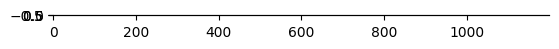

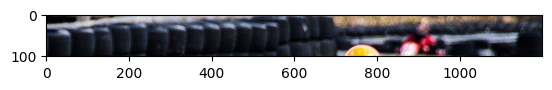

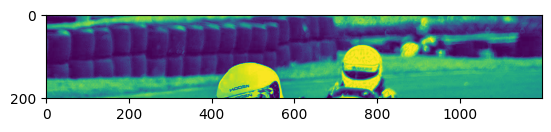

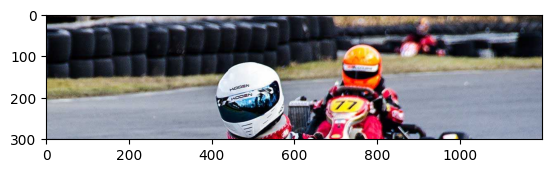

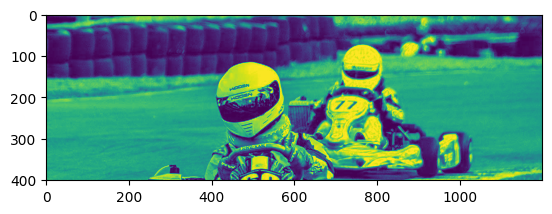

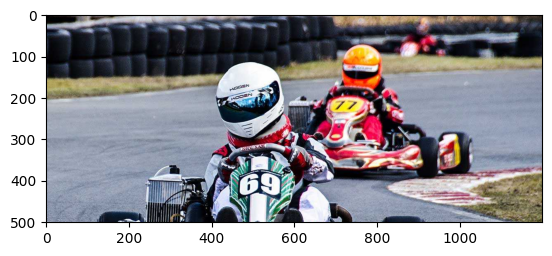

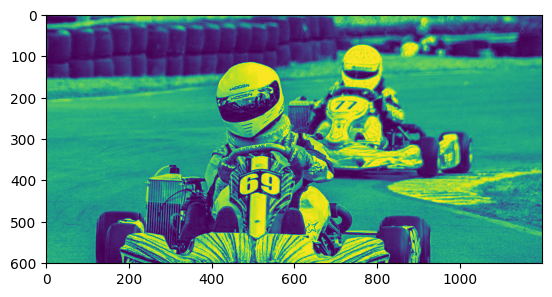

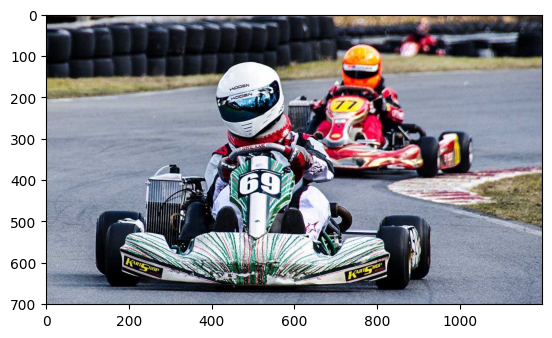

In [19]:
img = images[0]
img_array = np.array(img) #переводим в массив
print("Размер изображения \nВысота:", img_array.shape[0], 'Ширина:', img_array.shape[1], 'Каналы:',img_array.shape[2])
print_layers = [img_array[0]]
counter = 0
for layer in img_array:
    #print(layer.shape)
    if counter % 200 == 0:
        r, g, b = Image.fromarray(np.array(print_layers)).split()
        plt.imshow(r)
        plt.show()
    elif counter % 100 == 0:
        plt.imshow(print_layers)
        plt.show()
    counter+=1
    print_layers = np.append(print_layers,[layer], axis=0)
    

### Создание изображений

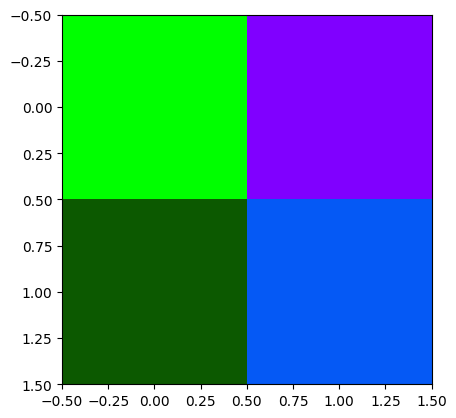

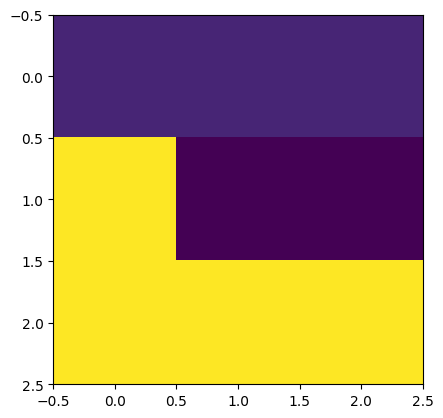

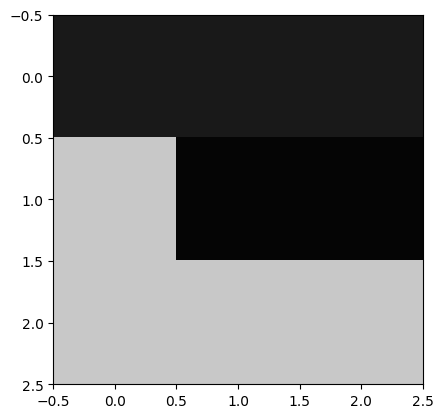

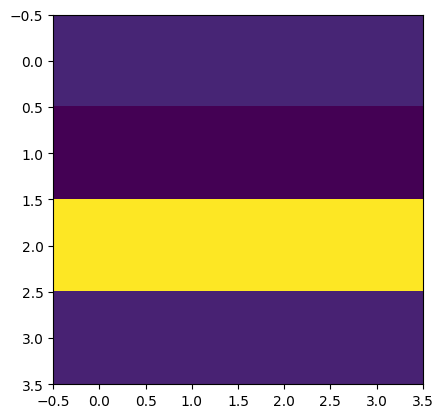

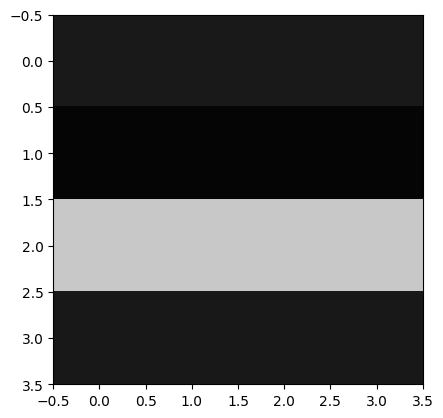

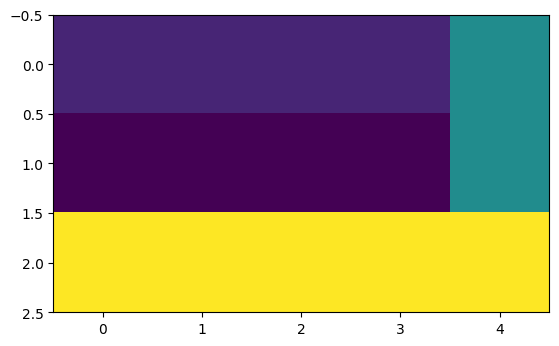

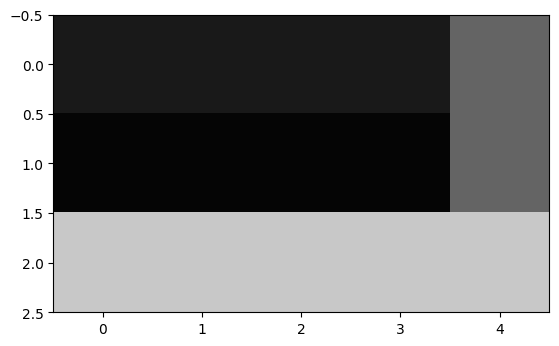

In [30]:
making_img = np.array([[[0, 255, 0], [128, 0, 255]], 
                    [[12, 89, 0], [5,  89, 245]]])
plt.imshow(making_img)
plt.show()

making_img = np.array([[25, 25, 25], [200, 5, 5], [200, 200, 200]])
plt.imshow(making_img)
plt.show()
making_img = Image.fromarray(making_img)
plt.imshow(making_img)
plt.show()

making_img = np.array([[25, 25, 25, 25], [5, 5, 5, 5], [200, 200, 200, 200], [24, 24, 24, 24]])
plt.imshow(making_img)
plt.show()
making_img = Image.fromarray(making_img)
plt.imshow(making_img)
plt.show()

making_img = np.array([[25, 25, 25, 25, 100], [5, 5, 5, 5, 100], [200, 200, 200, 200,200]])
plt.imshow(making_img)
plt.show()
making_img = Image.fromarray(making_img)
plt.imshow(making_img)
plt.show()

## Аугментации  
### Цветовые аугментации  
Рассмотрим на одной наиболее цветастой кратинке `images[0]`  
Изображение состоит из 3 каналов, их можно разделить `img.split()`  
Можно склеить из массивов `Image.fromarray` & `Image.merge`   
[Забавная статейка](https://habr.com/ru/articles/163663/) на хабре про изменение изображений.  
[Усредение гистограммы](https://stackoverflow.com/questions/7116113/normalize-histogram-brightness-and-contrast-of-a-set-of-images-using-python-im) яркости и контраста - ответ на стаковерфло (нижний)

[[ 18  19  20 ...  46  55  70]
 [ 16  16  18 ...  47  55  68]
 [ 12  13  14 ...  49  53  63]
 ...
 [157 150 148 ...  80  89 111]
 [158 148 147 ...  77  83 107]
 [158 148 146 ...  76  80 104]]


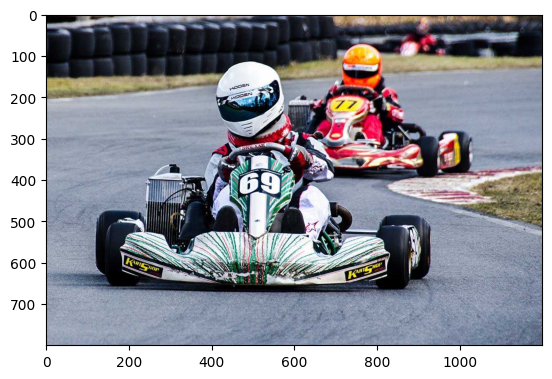

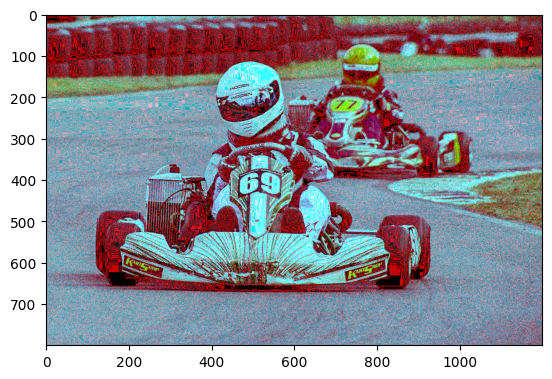

In [22]:
img = images[0]
r, g, b = img.split()

red_array = np.array(r)
print(red_array)
red_array *=100
r = Image.fromarray(red_array)
modified = Image.merge('RGB', (r, g, b))
#modified=cv.merge((np.array(b), np.array(g),red_array))
#cv.imshow('sample', modified)
plt.imshow(img)
plt.show()
plt.imshow(modified)
plt.show()

Изменяем яркость


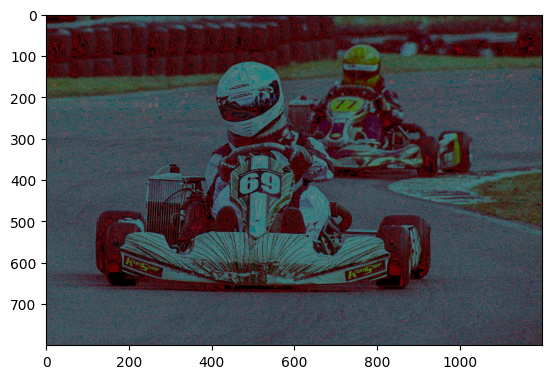

Изменяем резкость


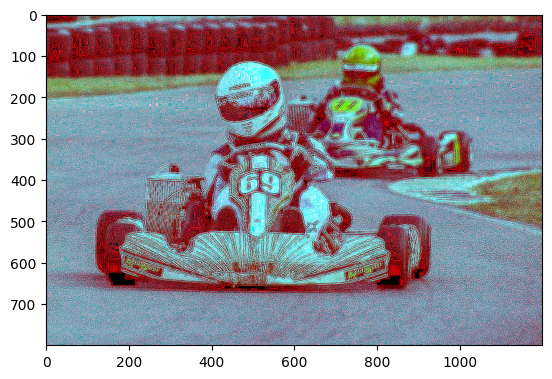

Изменяем контрастность


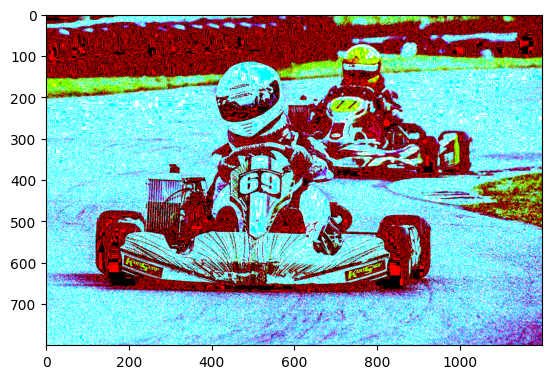

Изменяем цветовой баланс


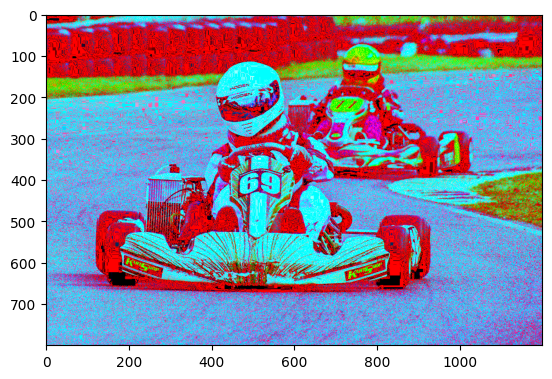

In [101]:
print('Изменяем яркость')
Brt_modified = ImageEnhance.Brightness(modified)  
plt.imshow(Brt_modified.enhance(.5))
plt.show()
print('Изменяем резкость')
Sharp_modified = ImageEnhance.Sharpness(modified)
plt.imshow(Sharp_modified.enhance(-10.0))
plt.show()
print('Изменяем контрастность')
Cont_modified = ImageEnhance.Contrast(modified)
plt.imshow(Cont_modified.enhance(5.0))
plt.show()
print('Изменяем цветовой баланс')
Clr_modified = ImageEnhance.Color(modified)
plt.imshow(Clr_modified.enhance(5.0))
plt.show()

### Повороты и отрожения  
Неплохая [статья](https://blog.knoldus.com/machinex-image-data-augmentation-using-keras/) про повороты изображений.

`ImageOps.mirror()` зеркально отражает изображение,  
`ImageOps.flip()` зеркально отражает изображение,  
`ImageOps.deform()` деформирует изображение,  
`ImageOps.exif_transpose()` ориентирует изображение в соответствии с тегом ​​Orientation.  

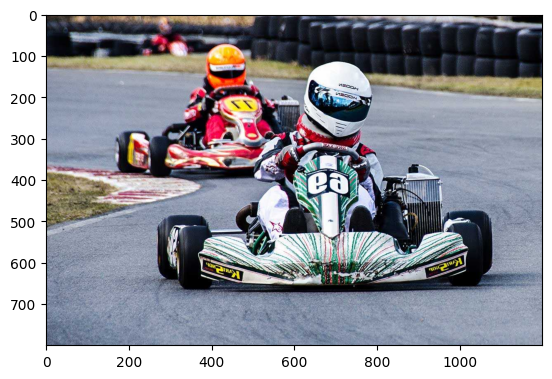

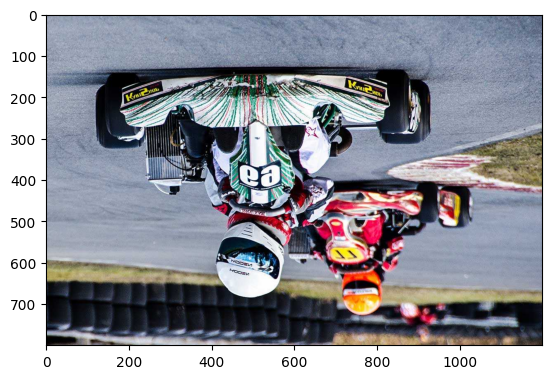

In [24]:
plt.imshow(ImageOps.mirror(img))
plt.show()
plt.imshow(ImageOps.flip(img))

## Задача классификации (свёрточные сети)  
Сюда же относятся задачи детекции (YOLO) и сегментации (U-Net)

Функции потерь для классификации : бинарная кросс-энтропия для двухклассовой классификации и обычная кросс-энтропия для случая, где классов больше двух  
Для детекции: кросс-энтропия, функция потерь локализации, фукнция потерь на классификацию всего найденного прямоугльника. Метрика качества: IoU    
Для сегмнтации: кросс-энтропия на пиксельном уровне. Метрики: Pixel Accuracy, IoU, коэф Дайса


### Логистическая регрессия  
При том, что в названгии регрессия - это классификация. Значит используем функцию активации. Также для бинарной классификации можно использовать BCE (binary кросс-энтропию)

In [123]:
def gen_and_norml(amount: int) -> np.array:
    generated_img = []
    for n in range(amount):
        a = np.random.rand(30,30, 1) * 255
        generated_img.append(a)
        #im_out = Image.fromarray(a.astype('uint8')).convert('RGB')
        #plt.imshow(im_out)
        #plt.show()
        np_img_array = np.stack(generated_img, axis=0)
    print(np_img_array.shape)
    normalized = np_img_array#/255 
    return normalized

In [125]:
features_train = gen_and_norml(10)
target_train = np.array([i for i in range(0, 10)])
features_test = gen_and_norml(3)
target_test = np.array([i for i in range(0, 3)])

features_train = features_train.reshape(features_train.shape[0], 30*30, 1)
features_test = features_test.reshape(features_test.shape[0], 30*30, 1)
'''
features_train = features_train.reshape(features_train.shape[0], features_train.shape[1]*features_train.shape[2], 3)
features_test = features_test.reshape(features_test.shape[0], features_test.shape[1]*features_test.shape[2], 3)
'''
print(features_train.shape[1])
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=10, input_dim=features_train.shape[1],  activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',  metrics=['acc']) 
model.fit(features_train,  target_train, epochs=5, verbose=2, validation_data=(features_test, target_test))

(10, 30, 30, 1)
(3, 30, 30, 1)
900
Epoch 1/5
1/1 - 0s - 442ms/step - acc: 0.0000e+00 - loss: 317.1278 - val_acc: 0.0000e+00 - val_loss: 20573.0547
Epoch 2/5
1/1 - 0s - 51ms/step - acc: 0.5000 - loss: 11759.2236 - val_acc: 0.0000e+00 - val_loss: 10696.7432
Epoch 3/5
1/1 - 0s - 61ms/step - acc: 0.6000 - loss: 11195.1455 - val_acc: 0.0000e+00 - val_loss: 15215.2314
Epoch 4/5
1/1 - 0s - 53ms/step - acc: 0.3000 - loss: 7516.3213 - val_acc: 0.0000e+00 - val_loss: 15668.4922
Epoch 5/5
1/1 - 0s - 65ms/step - acc: 0.5000 - loss: 9864.4727 - val_acc: 0.3333 - val_loss: 292.4697


## Задача регрессии  
*Осторожно* Датасеты - бессмысленные.     
[Наглядное пособие](https://playground.tensorflow.org) от tenserflow  
### Линейная регрессия

In [11]:
data = pd.read_csv('meaningless_dataset.csv')
features = data.drop('target', axis=1)
target = data['target']
features_valid = data.drop('target', axis=1)
target_valid = data['target']

# создание модели
model = keras.models.Sequential()
# добавляется слой
# Dense - полносвязный слой, units - количество нейронов в слое, input_dim - количество входов в слое
model.add(keras.layers.Dense(units=1, input_dim=features.shape[1])) 
# когда все слои стоят, указываем функцию потерь и оптимизатор (SGD)
model.compile(loss='mean_squared_error', optimizer='sgd')
# обучаем модель
model.fit(features, target, validation_data=(features_valid, target_valid), epochs=3, verbose=1) 

Epoch 1/3


c:\Users\Maria Smirnova\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: nan - val_loss: nan
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - val_loss: nan
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - val_loss: nan


from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd

train_datagen = ImageDataGenerator(rescale=1./255) 
train_gen_flow = train_datagen.flow_from_dataframe(dataframe=labels, directory='/datasets/faces/final_files/', 
                                                   x_col='file_name', y_col='real_age', target_size=(224, 224), 
                                                   batch_size=32, class_mode='raw', seed=12345)

def load_train(path):
    file_path = str(path) + 'labels.csv'
    df = pd.read_csv(file_path)
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255, vertical_flip=True)
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=df, directory=path+'final_files/',  x_col='file_name', y_col='real_age',target_size=(224, 224), batch_size=16, class_mode='raw', subset='training',  seed=12345)
    return train_datagen_flow

def load_test(path):
    file_path = str(path) + '/labels.csv'
    df = pd.read_csv(file_path)
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=df, directory=path+'final_files/', x_col='file_name', y_col='real_age', target_size=(224, 224), batch_size=16, class_mode='raw', subset='validation',  seed=12345)
    return test_datagen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
    #backbone.trainable = False
    model = Sequential()
    model.add(backbone)
    model.add(Flatten())
    model.add(Dense(units=84, activation='relu'))
    #model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model
    
def train_model (model, train_data, test_data, batch_size=None, epochs=15,steps_per_epoch=None, validation_steps=None):

    model.fit(train_data, validation_data=test_data, batch_size=batch_size, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, verbose=2)
    return model

### ResNet c загружаемыми весами

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np

def load_train(path):
    train_datagen = ImageDataGenerator(rescale=1/255., vertical_flip=True, horizontal_flip=True)
    train_datagen_flow = train_datagen.flow_from_directory(path, target_size=(150, 150), batch_size=16, class_mode='sparse',  seed=12345)
    #train_datagen = ImageDataGenerator(rescale=1/255., vertical_flip=True, horizontal_flip=True, rotation_range=90, width_shift_range=0.20, height_shift_range=0.20)
    return train_datagen_flow

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, include_top=False, weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
    #backbone.trainable = False
    '''
    model = Sequential()
    model.add(backbone)
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=12, activation='softmax'))
    '''
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='softmax'))

    optimizer = Adam(lr=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    return model
    
def train_model (model, train_data, test_data, batch_size=None, 
                 epochs=7,steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data, 
              batch_size=batch_size, epochs=epochs, 
              steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, 
              verbose=2)
    return model